# Benchmarking Our Implementation of Skip Lists
## Dominic Zagra, Evan Schubert, Zachary Wentz

In [1]:
import matplotlib.pyplot as plt
from SkipList import SkipList
import time
import copy
from scipy.stats import linregress
import numpy as np

In the cell below, we establish the skip list sizes we will use for benchmarking.

In [2]:
skip_list_sizes = [1000, 10000, 50000, 100000, 500000, 1000000, 2000000]

The function below is used to generate skip lists of a specified size.

In [3]:
def get_skip_list(size):
    skip_list = SkipList(20) #20 is max level
    for i in range(size):
        skip_list.insert(i)
    
    return skip_list

### Benchmarking Insertion for Skip Lists

The cell below benchmarks adding an element to a skip list.

In [ ]:
insertion_times = []
for size in skip_list_sizes:
    insertion_time_sum = 0
    skip_list = get_skip_list(size)

    for i in range(100):
        start_time = time.perf_counter()
        skip_list.insert(size)
        end_time = time.perf_counter()
        insertion_time_sum += (end_time - start_time)
        skip_list.remove(size) # Remove the element we just added so we have a skip list of size each time we insert in inner for loop

    insertion_times.append(insertion_time_sum / 15)

The next cell plots the runtime results for adding an element to skip lists of various sizes.

Text(0.5, 1.0, 'Time to Insert Element into Skip Lists of Various Sizes')

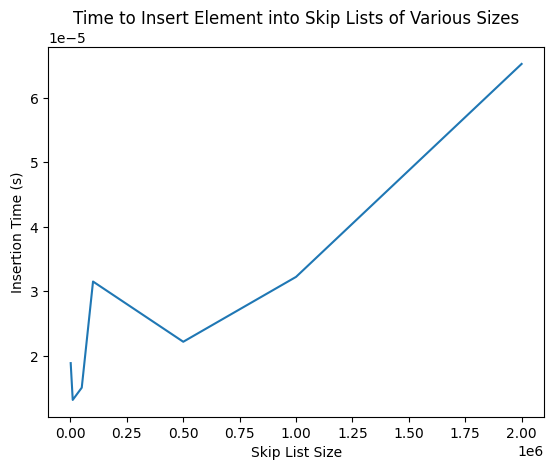

In [5]:
plt.plot(skip_list_sizes, insertion_times)
plt.xlabel("Skip List Size")
plt.ylabel("Insertion Time (s)")
plt.title("Time to Insert Element into Skip Lists of Various Sizes")

In the cell below, we estimate the runtime complexity of adding an element to a skip list based on the measured run times.

In [6]:
m1, b1, _, _, _ = linregress(np.log(skip_list_sizes), np.log(insertion_times))
print(f"Slope of the runtime for adding to a skip list is {m1}")

Slope of the runtime for adding to a skip list is 0.14579762698898038


Since the slope of the runtime for adding an element to a skip list is about 0.146, this indicates the runtime for adding an element to a skip list is O(logn), where n is the number of nodes/elements in the skip list.

### Benchmarking Deletion for Skip Lists

The cell below benchmarks deleting an element from a skip list.

In [ ]:
deletion_times = []
for size in skip_list_sizes:
    deletion_time_sum = 0
    skip_list = get_skip_list(size)

    for i in range(100):
        start_time = time.perf_counter()
        skip_list.remove(size)
        end_time = time.perf_counter()
        deletion_time_sum += (end_time - start_time)
        skip_list.insert(size)  # Add the element we just removed so we have a skip list of size each time we insert in inner for loop

    deletion_times.append(deletion_time_sum / 15)

The next cell plots the runtime results for deleting an element from skip lists of various sizes.

Text(0.5, 1.0, 'Time to Delete Element from Skip Lists of Various Sizes')

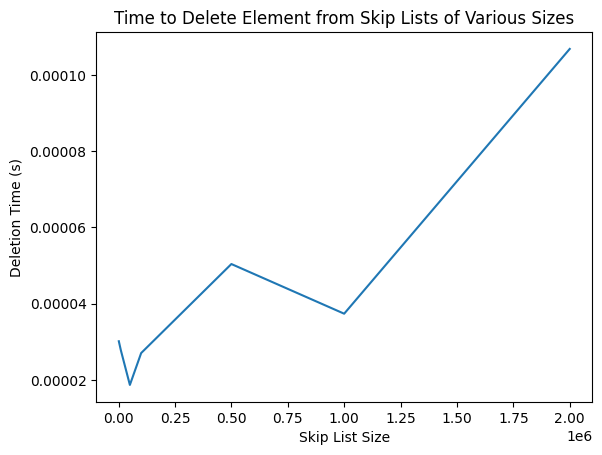

In [8]:
plt.plot(skip_list_sizes, deletion_times)
plt.xlabel("Skip List Size")
plt.ylabel("Deletion Time (s)")
plt.title("Time to Delete Element from Skip Lists of Various Sizes")

In the cell below, we estimate the runtime complexity of removing an element from a skip list based on the measured run times.

In [9]:
m1, b1, _, _, _ = linregress(np.log(skip_list_sizes), np.log(deletion_times))
print(f"Slope of the runtime for deleting from a skip list is {m1}")

Slope of the runtime for deleting from a skip list is 0.1317268697795569


Since the slope of the runtime for deleting an element from a skip list is about 0.132, this indicates the runtime for removing an element from a skip is O(logn), where n is the number of nodes/elements in the skip list.

### Benchmarking Searching for Elements for Skip Lists

The cell below benchmarks searching for an element in a skip list.

In [ ]:
searching_times = []
for size in skip_list_sizes:
    searching_time_sum = 0
    skip_list = get_skip_list(size)

    for i in range(100):
        start_time = time.perf_counter()
        skip_list.contains(size - 1)
        end_time = time.perf_counter()
        searching_time_sum += (end_time - start_time)

    searching_times.append(searching_time_sum / 15)

The next cell plots the runtime results for searching for an element in skip lists of various sizes.

Text(0.5, 1.0, 'Time to Search For Element in Skip Lists of Various Sizes')

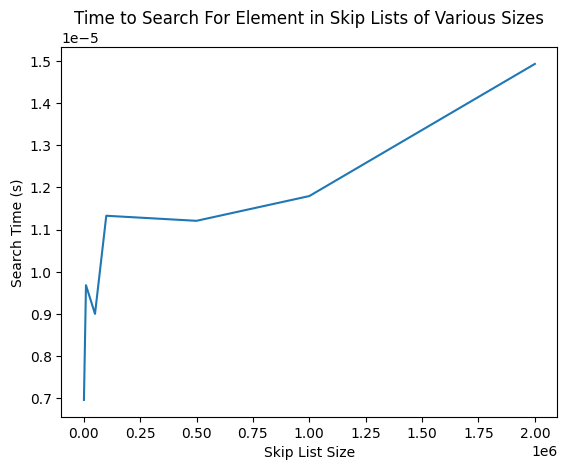

In [14]:
plt.plot(skip_list_sizes, searching_times)
plt.xlabel("Skip List Size")
plt.ylabel("Search Time (s)")
plt.title("Time to Search For Element in Skip Lists of Various Sizes")

In the cell below, we estimate the runtime complexity of searching for an element in a skip list based on the measured run times.

In [15]:
m1, b1, _, _, _ = linregress(np.log(skip_list_sizes), np.log(searching_times))
print(f"Slope of the runtime for searching from a skip list is {m1}")

Slope of the runtime for searching from a skip list is 0.08244478228611395


Since the slope of the runtime for searching for an element in a skip list is about 0.082, this indicates the runtime for searching for an element in a skip list is O(logn), where n is the number of nodes/elements in the skip list.